In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\16508\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data_dir = "/Users/16508/Documents/DSC180_sleep_apnea_group2/actigraphy"

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'hchs-sol-sueno-00163225.csv'))

In [4]:
print(df[df.wake == 1.0].activity.mean())
print(df[df.wake == 0].activity.mean())
print(df.activity.min(), df.activity.max())

190.2146755162242
0.5264302059496567
0 1300


In [5]:
# df.day = df.day.apply(lambda x: str(x))
# df.time = df.time.apply(lambda x: str(x))
# df.time = df.day + ':' + df.time
# df.time = pd.to_datetime(df['time'],format= '%d:%H:%M:%S').dt.time

In [6]:
def seconds(time):
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [7]:
df['seconds'] = (df.day - 1) * 86400 + df.time.apply(seconds)
df = df.dropna(subset=['wake', 'seconds', 'activity'])
df = df.reset_index()
df = df.sort_values(['seconds'])

In [8]:
df.iloc[:100]

,index,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,seconds
986,990,163225,1,991,0,4,0,1.05,0.0386,0.1050,0.0412,1.0,ACTIVE,0,1,6,1,0:00:00,0
987,991,163225,1,992,0,1,0,0.69,0.0256,0.0694,0.0235,1.0,ACTIVE,0,1,6,1,0:00:30,30
988,992,163225,1,993,0,271,0,0.68,0.0170,0.0694,0.0347,1.0,ACTIVE,0,1,6,1,0:01:00,60
989,993,163225,1,994,0,353,0,0.51,0.0128,0.0523,0.0173,1.0,ACTIVE,0,1,6,1,0:01:30,90
990,994,163225,1,995,0,0,0,0.51,0.0128,0.0523,0.0173,1.0,ACTIVE,0,1,6,1,0:02:00,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1085,163225,1,1086,0,238,0,0.51,0.0128,0.0523,0.0173,1.0,REST-S,0,1,6,1,0:47:30,2850
1082,1086,163225,1,1087,0,79,0,0.51,0.0128,0.0523,0.0173,1.0,REST-S,0,1,6,1,0:48:00,2880
1083,1087,163225,1,1088,0,1,0,0.19,0.0128,0.0173,0.0059,1.0,REST-S,0,1,6,1,0:48:30,2910
1084,1088,163225,1,1089,0,45,0,0.36,0.0128,0.0378,0.0023,1.0,REST-S,0,1,6,1,0:49:00,2940


In [9]:
df['new day'] = df['time'] == ''

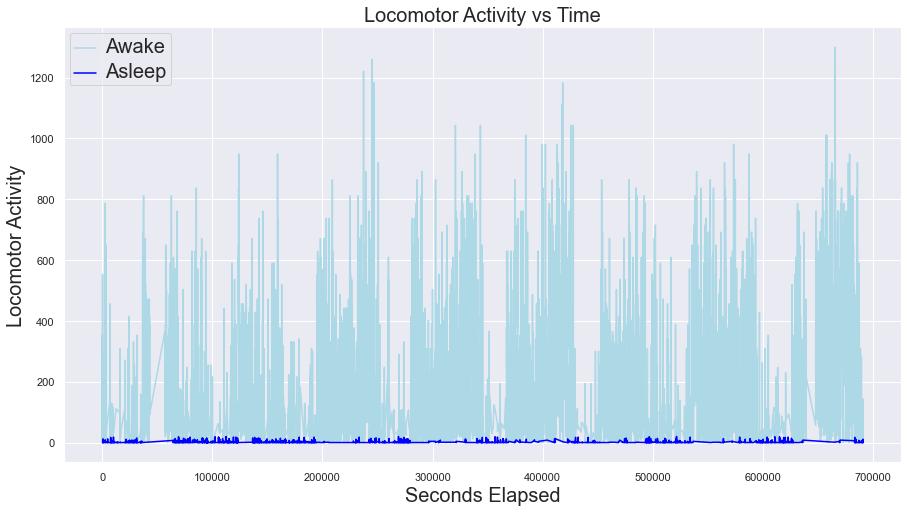

In [26]:
sns.set(rc={"figure.figsize":(15, 8)})
fig1 = sns.lineplot(x='seconds', y='activity', data=df[df.wake == 1.0], color='lightblue')
fig2 = sns.lineplot(x='seconds', y='activity', data=df[df.wake == 0], color='blue')
plt.legend(labels = ['Awake', 'Asleep'])
plt.setp(fig1.get_legend().get_texts(), fontsize='20')
plt.xlabel('Seconds Elapsed', fontsize=20)
plt.ylabel('Locomotor Activity', fontsize=20)
plt.title('Locomotor Activity vs Time', fontsize=20)

plt.show()

In [11]:
print(len(df[df.wake == 1.0]))
print(len(df[df.wake == 0]))

13560
8740


In [12]:
df[df.seconds == 10800].index

Int64Index([1346], dtype='int64')

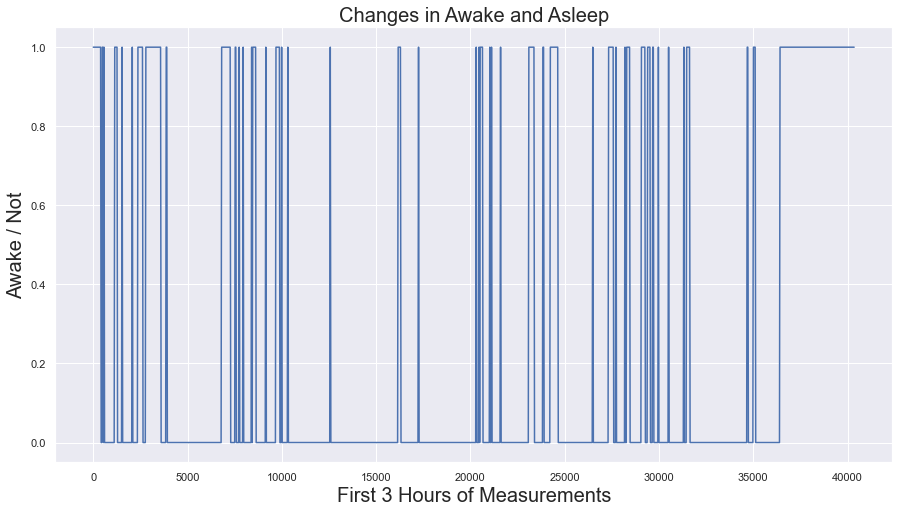

In [13]:
fig3 = sns.lineplot(x='seconds', y='wake', data=df.iloc[:1346])
plt.xlabel('First 3 Hours of Measurements', fontsize=20)
plt.ylabel('Awake / Not', fontsize=20)
plt.title('Changes in Awake and Asleep', fontsize=20)
plt.show()

In [14]:
df2 = pd.read_csv(os.path.join(data_dir, 'hchs-sol-sueno-00238589.csv'))

In [15]:
df2

,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time
0,238589,1,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:00
1,238589,1,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:30
2,238589,1,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:00
3,238589,1,4,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:30
4,238589,1,5,0,234.0,0,311.93,42.2000,24.6000,3.0700,NaN,ACTIVE,0,1,4,1,14:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19756,238589,1,19757,0,0.0,0,0.28,0.0256,0.0251,0.0023,NaN,ACTIVE,0,7,4,1,10:44:00
19757,238589,1,19758,0,95.0,0,25.81,3.3500,2.0800,0.1690,NaN,ACTIVE,0,7,4,1,10:44:30
19758,238589,1,19759,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,7,4,1,10:45:00
19759,238589,1,19760,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,7,4,1,10:45:30


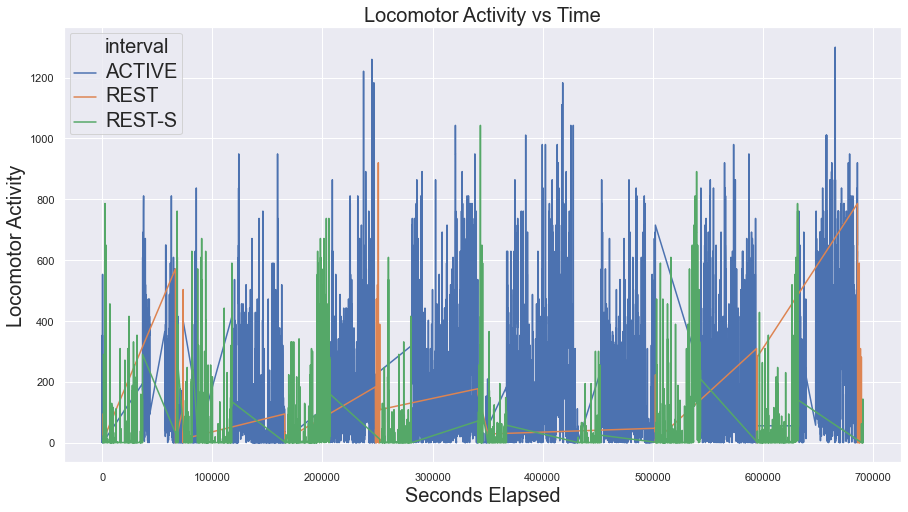

In [16]:
fig4 = sns.lineplot(x='seconds', y='activity', data=df, hue='interval')
plt.legend()
plt.setp(fig4.get_legend().get_texts(), fontsize='20')
plt.xlabel('Seconds Elapsed', fontsize=20)
plt.ylabel('Locomotor Activity', fontsize=20)
plt.title('Locomotor Activity vs Time', fontsize=20)

plt.show()

In [17]:
def interval(x):
    if x == 'ACTIVE':
        return 1
    elif x == 'REST-S':
        return 0
    else:
        return -1

In [18]:
df['interval2'] = df['interval'].apply(interval)

In [27]:
df[df['seconds'] == 60 * 60 * 24]

,index,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,...,wake,interval,starth,day,dayofweek,validday,time,seconds,new day,interval2
3866,3870,163225,1,3871,0,43,0,0.19,0.0128,0.0173,...,1.0,REST-S,0,2,7,1,0:00:00,86400,False,0


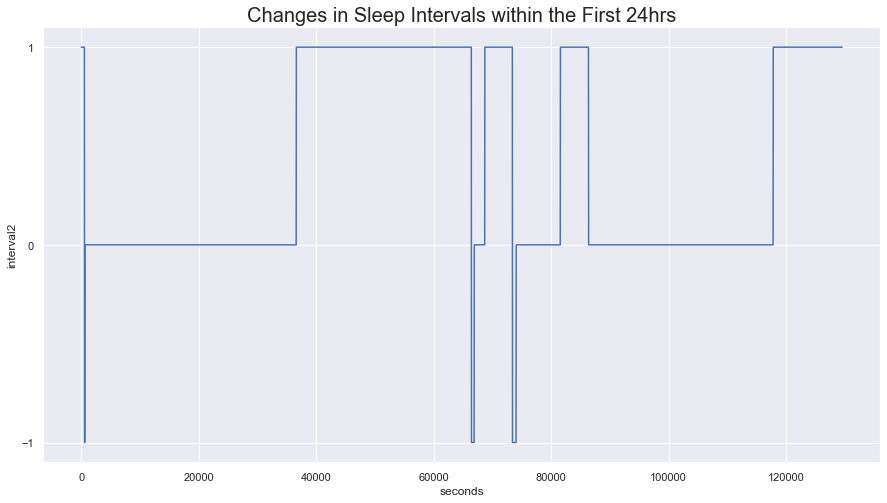

In [29]:
fig5 = sns.lineplot(x='seconds', y='interval2', data=df.iloc[:3866])
plt.yticks([-1, 0, 1])
plt.title('Changes in Sleep Intervals within the First 24hrs', fontsize=20)
plt.show()

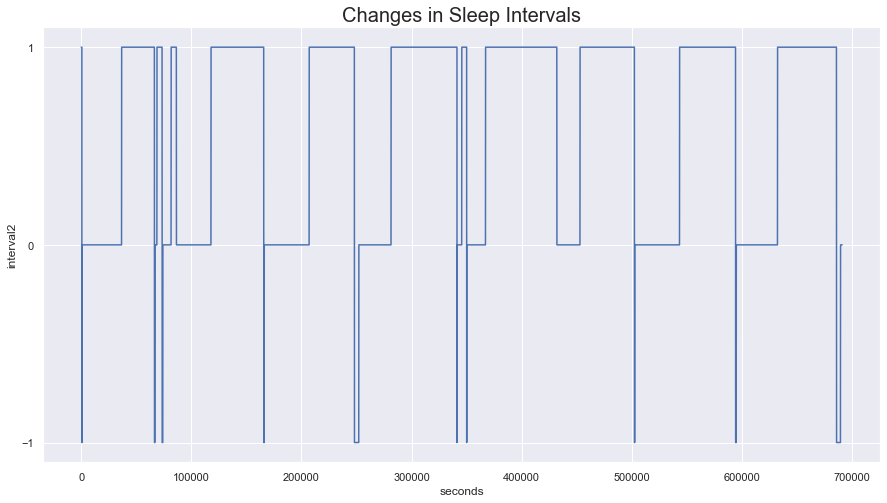

In [30]:
fig6 = sns.lineplot(x='seconds', y='interval2', data=df)
plt.yticks([-1, 0, 1])
plt.title('Changes in Sleep Intervals', fontsize=20)
plt.show()

In [20]:
df2['seconds'] = (df2.day - 1) * 86400 + df2.time.apply(seconds)
df2 = df2.dropna(subset=['wake', 'seconds', 'activity'])
df2 = df2.reset_index()
df2 = df2.sort_values(['seconds'])